In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
tunnel = pd.read_csv('Data/tunnel.csv',index_col='Day',parse_dates=['Day']).to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [42]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [45]:
df.columns

Index(['NumVehicles', 'Time'], dtype='object')

In [46]:
X = df.loc[:,['Time']]
y = df.loc[:,'NumVehicles']

In [47]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [49]:
y_pred = pd.Series(model.predict(X),index=X.index)
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

In [51]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [52]:
X = df.loc[:,['Lag_1']].dropna()
y = df.loc[:,'NumVehicles']
X.head()

,Lag_1
Day,
2003-11-02,103536.0
2003-11-03,92051.0
2003-11-04,100795.0
2003-11-05,102352.0
2003-11-06,106569.0


In [53]:
y.head()

Day
2003-11-01    103536
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
Freq: D, Name: NumVehicles, dtype: int64

In [54]:
y,X = y.align(X,join='inner')

In [55]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [56]:
y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

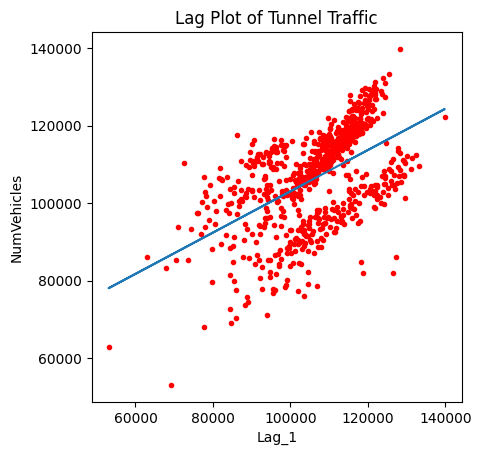

In [57]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='red')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')